<a href="https://colab.research.google.com/github/glamosky/labor-and-employment/blob/main/labor%20and%20employment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [283]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# Employment Rates
Labor Force Participation Rate, Employment Rate, Unemployment Rate, Underemployment Rate, and Visible Underemployment Rate

*WARNING: Always filter out unwanted columns on the OpenStat Website first.*

In [284]:
url = "https://raw.githubusercontent.com/glamosky/labor-and-employment/refs/heads/main/employment%20rate.csv"

In [285]:
employment = pd.read_csv(url, skiprows=1)

employment

,Year,Monthly/Quarterly,Labor Force Participation Rate,Employment Rate,Unemployment Rate,Underemployment Rate,Visible Underemployment Rate
0,2025,January,63.86,95.73,4.27,13.34,8.03
1,2025,February,..,..,..,..,..
2,2025,March,..,..,..,..,..
3,2025,April,..,..,..,..,..
4,2025,May,..,..,..,..,..
...,...,...,...,...,...,...,...
268,2005,September,..,..,..,..,..
269,2005,October,65.29,92.62,7.38,20.90,12.76
270,2005,November,..,..,..,..,..
271,2005,December,..,..,..,..,..


In [286]:
employment = employment.replace([".."], 0)

employment = employment.replace(0, np.nan)

In [287]:
employment = employment.rename(columns = {'Monthly/Quarterly':'Month'})

In [288]:
employment = employment[employment.Month != 'Annual']

employment

,Year,Month,Labor Force Participation Rate,Employment Rate,Unemployment Rate,Underemployment Rate,Visible Underemployment Rate
0,2025,January,63.86,95.73,4.27,13.34,8.03
1,2025,February,NaN,NaN,NaN,NaN,NaN
2,2025,March,NaN,NaN,NaN,NaN,NaN
3,2025,April,NaN,NaN,NaN,NaN,NaN
4,2025,May,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
267,2005,August,NaN,NaN,NaN,NaN,NaN
268,2005,September,NaN,NaN,NaN,NaN,NaN
269,2005,October,65.29,92.62,7.38,20.90,12.76
270,2005,November,NaN,NaN,NaN,NaN,NaN


In [289]:
employment = pd.melt(
    employment,
    id_vars = ["Year", "Month"],
    value_vars = employment.columns[2:],
    var_name = "Rate Category",
    value_name = "Rate"
)

employment

,Year,Month,Rate Category,Rate
0,2025,January,Labor Force Participation Rate,63.86
1,2025,February,Labor Force Participation Rate,NaN
2,2025,March,Labor Force Participation Rate,NaN
3,2025,April,Labor Force Participation Rate,NaN
4,2025,May,Labor Force Participation Rate,NaN
...,...,...,...,...
1255,2005,August,Visible Underemployment Rate,NaN
1256,2005,September,Visible Underemployment Rate,NaN
1257,2005,October,Visible Underemployment Rate,12.76
1258,2005,November,Visible Underemployment Rate,NaN


In [290]:
# Ensure the Rate column is numeric
employment["Rate"] = pd.to_numeric(employment["Rate"], errors="coerce")

In [291]:
employment["Rate Category"].unique()

array(['Labor Force Participation Rate', 'Employment Rate',
       'Unemployment Rate', 'Underemployment Rate',
       'Visible Underemployment Rate'], dtype=object)

*I realized that using groupby() would make your life easier*

In [292]:
# for category in employment["Rate Category"].unique():
#   print(f"Description for {category}:")
#   # Filter out zero values before calculating descriptive statistics
#   filtered_data = employment[(employment["Rate Category"] == category) & (employment["Rate"] != 0)]
#   print(filtered_data["Rate"].describe())
#   print("\n")

In [293]:
descriptions = employment.groupby("Rate Category")["Rate"].describe()
print(descriptions)

                                count       mean       std    min    25%  \
Rate Category                                                              
Employment Rate                 113.0  93.711858  1.942056  82.40  92.61   
Labor Force Participation Rate  113.0  63.739469  1.829068  55.69  63.30   
Underemployment Rate            113.0  16.435044  3.432924   9.85  13.80   
Unemployment Rate               113.0   6.288053  1.942143   3.07   4.83   
Visible Underemployment Rate    113.0  10.058938  2.132274   5.52   8.46   

                                  50%    75%    max  
Rate Category                                        
Employment Rate                 93.59  95.17  96.93  
Labor Force Participation Rate  64.00  64.80  67.45  
Underemployment Rate            16.28  19.01  25.76  
Unemployment Rate                6.41   7.39  17.60  
Visible Underemployment Rate    10.13  11.56  16.22  


In [294]:
# for category in employment["Rate Category"].unique():
#   # Filter the data for the current category
#   filtered_data = employment[(employment["Rate Category"] == category) & (employment["Rate"] != 0)]

#   # Calculate median and mean for the current category
#   median = filtered_data["Rate"].median()
#   mean = filtered_data["Rate"].mean()

#   plt.figure(figsize=(10, 6))
#   sns.histplot(filtered_data["Rate"], bins=50, kde=True, color="royalblue", edgecolor="black")  # Plot "Rate" for the filtered data
#   plt.axvline(median, color='red', linestyle='dashed', linewidth=2, label="Median")
#   plt.axvline(mean, color='green', linestyle='dashed', linewidth=2, label="Mean")
#   plt.title(f"Distribution of {category}")
#   plt.xlabel("Rate")
#   plt.ylabel("Frequency")
#   plt.legend()
#   plt.grid()

#   plt.show()

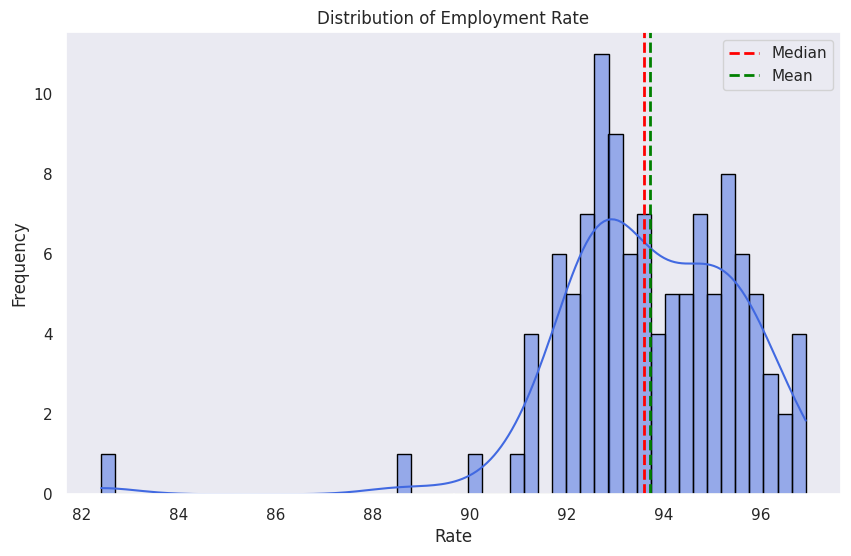

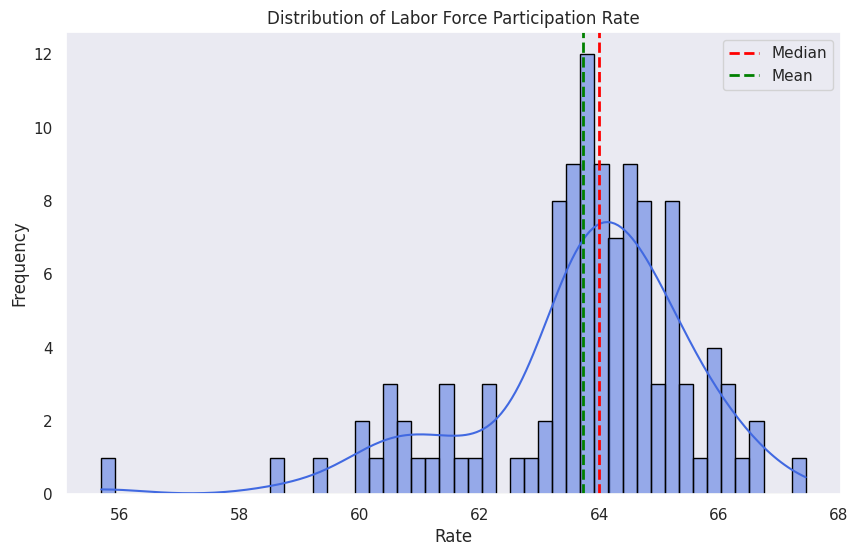

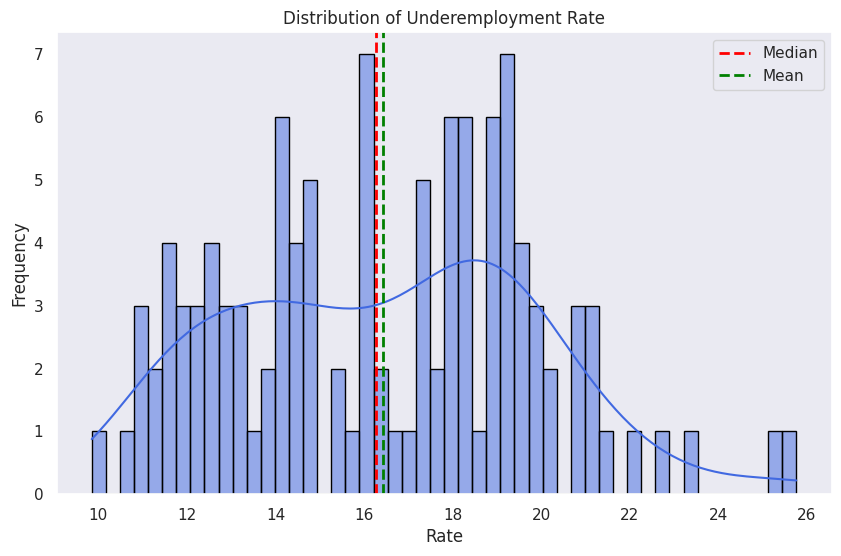

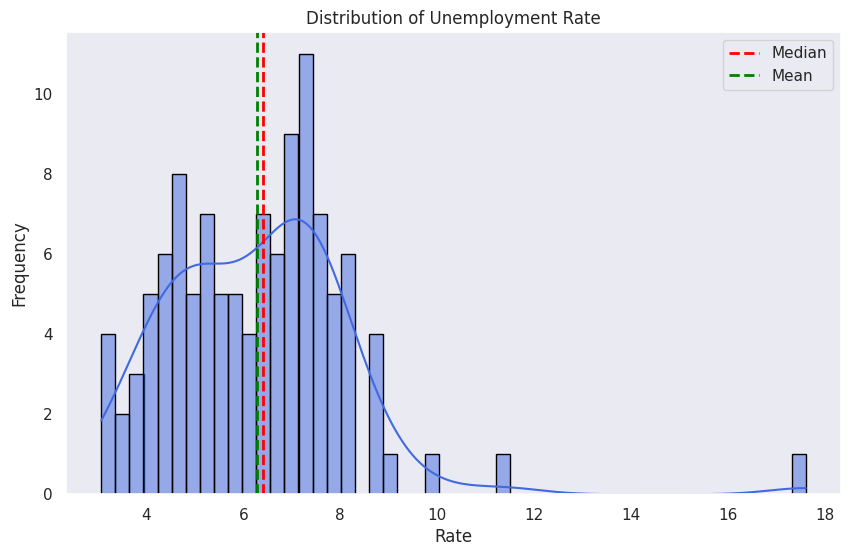

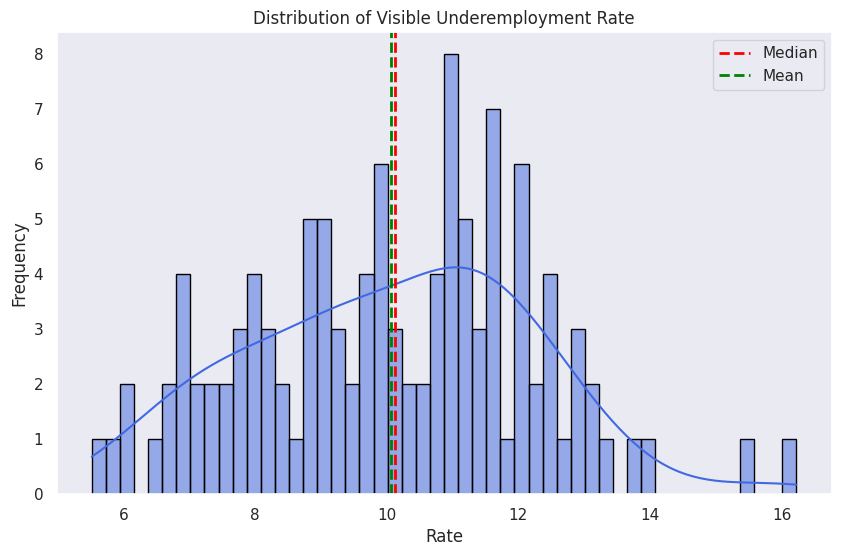

In [295]:
for category, group in employment.groupby("Rate Category"):
    median = group["Rate"].median()
    mean = group["Rate"].mean()

    plt.figure(figsize=(10, 6))
    sns.histplot(group["Rate"], bins=50, kde=True, color="royalblue", edgecolor="black")
    plt.axvline(median, color='red', linestyle='dashed', linewidth=2, label="Median")
    plt.axvline(mean, color='green', linestyle='dashed', linewidth=2, label="Mean")
    plt.title(f"Distribution of {category}")
    plt.xlabel("Rate")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid()

    plt.show()

In [296]:
# for category in employment["Rate Category"].unique():
#     # Filter data for the current category and exclude zero values
#     filtered_data = employment[(employment["Rate Category"] == category) & (employment["Rate"] != 0)]

#     # Compute quantiles once for the filtered data
#     quantiles = filtered_data["Rate"].quantile([0.25, 0.5, 0.75])

#     print(f"Quantiles for {category}:")
#     print(quantiles)
#     print("\n")

In [297]:
quantiles = employment.groupby("Rate Category")["Rate"].quantile([0.25, 0.5, 0.75])
print(quantiles)

Rate Category                       
Employment Rate                 0.25    92.61
                                0.50    93.59
                                0.75    95.17
Labor Force Participation Rate  0.25    63.30
                                0.50    64.00
                                0.75    64.80
Underemployment Rate            0.25    13.80
                                0.50    16.28
                                0.75    19.01
Unemployment Rate               0.25     4.83
                                0.50     6.41
                                0.75     7.39
Visible Underemployment Rate    0.25     8.46
                                0.50    10.13
                                0.75    11.56
Name: Rate, dtype: float64


In [298]:
# IQR
Q1 = employment.groupby("Rate Category")["Rate"].quantile(0.25)
Q3 = employment.groupby("Rate Category")["Rate"].quantile(0.75)
IQR = Q3 - Q1
IQR

,Rate
Rate Category,
Employment Rate,2.56
Labor Force Participation Rate,1.50
Underemployment Rate,5.21
Unemployment Rate,2.56
Visible Underemployment Rate,3.10


In [299]:
# Outlier thresholds using 1.5 * IQR rule
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(Rate Category
 Employment Rate                   88.770
 Labor Force Participation Rate    61.050
 Underemployment Rate               5.985
 Unemployment Rate                  0.990
 Visible Underemployment Rate       3.810
 Name: Rate, dtype: float64,
 Rate Category
 Employment Rate                   99.010
 Labor Force Participation Rate    67.050
 Underemployment Rate              26.825
 Unemployment Rate                 11.230
 Visible Underemployment Rate      16.210
 Name: Rate, dtype: float64)

In [300]:
# determine the dates of the outliers
# lower bound
outliers_lower = employment[employment["Rate"] < employment["Rate Category"].map(lower_bound)]
outliers_lower

,Year,Month,Rate Category,Rate
30,2023,July,Labor Force Participation Rate,60.09
36,2022,January,Labor Force Participation Rate,60.54
48,2021,January,Labor Force Participation Rate,60.50
54,2021,July,Labor Force Participation Rate,59.41
63,2020,April,Labor Force Participation Rate,55.69
69,2020,October,Labor Force Participation Rate,58.74
72,2019,January,Labor Force Participation Rate,60.24
87,2018,April,Labor Force Participation Rate,60.91
90,2018,July,Labor Force Participation Rate,60.06
93,2018,October,Labor Force Participation Rate,60.55


In [301]:
# upper bound
outliers_upper = employment[employment["Rate"] > employment["Rate Category"].map(upper_bound)]
outliers_upper

,Year,Month,Rate Category,Rate
46,2022,November,Labor Force Participation Rate,67.45
567,2020,April,Unemployment Rate,17.60
744,2005,January,Unemployment Rate,11.40
1071,2020,April,Visible Underemployment Rate,16.22


In [302]:
employment["Date"] = pd.to_datetime(employment["Year"].astype(str) + "-" + employment["Month"])

<ipython-input-302-2c61fcf4f6d4>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  employment["Date"] = pd.to_datetime(employment["Year"].astype(str) + "-" + employment["Month"])


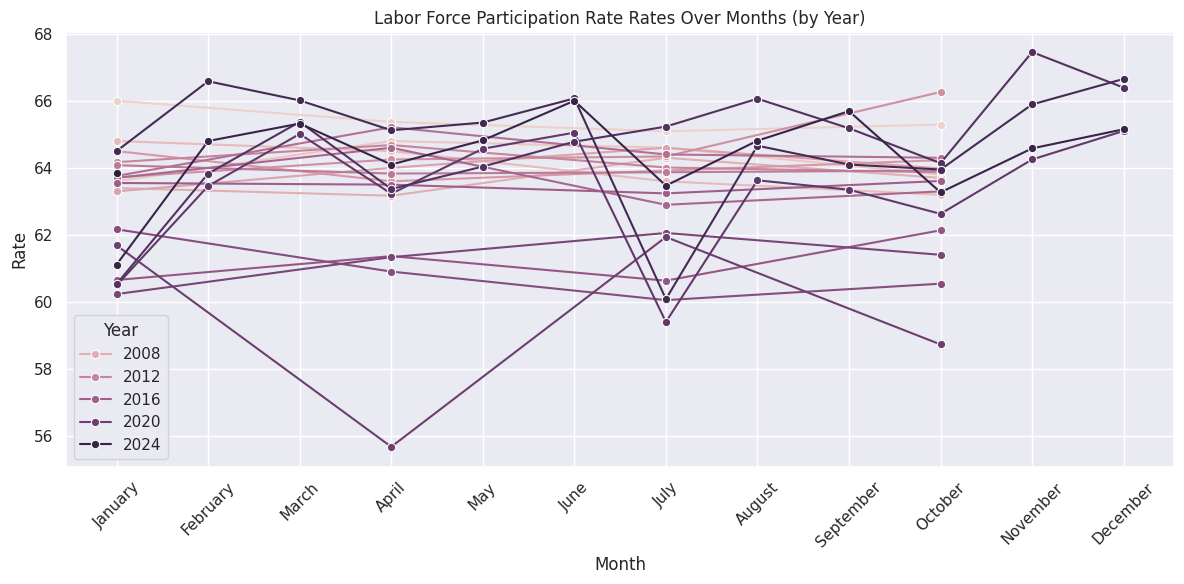

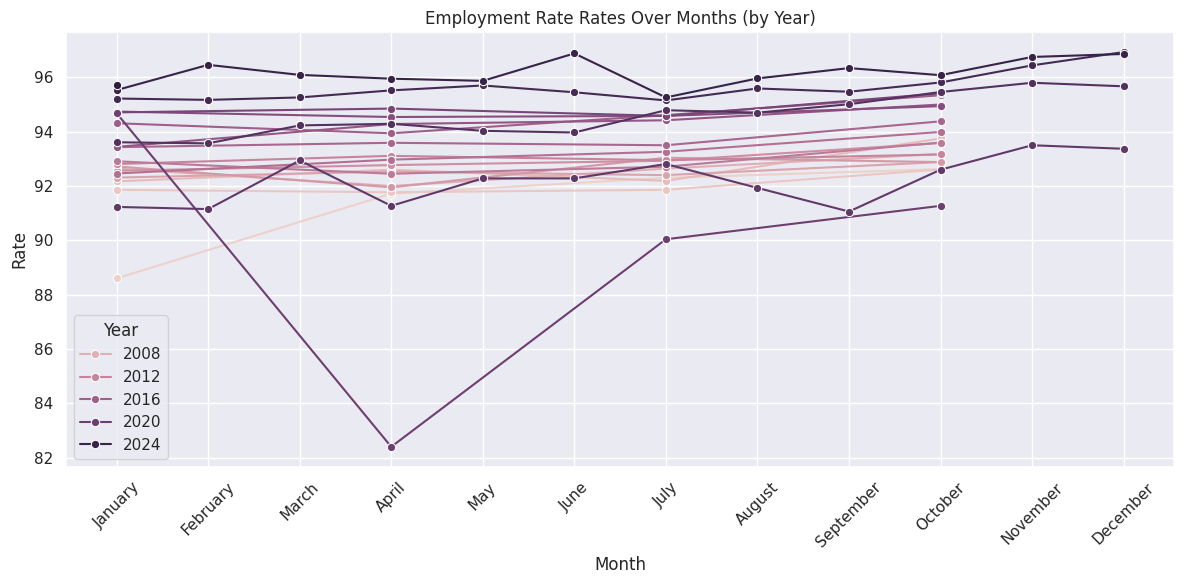

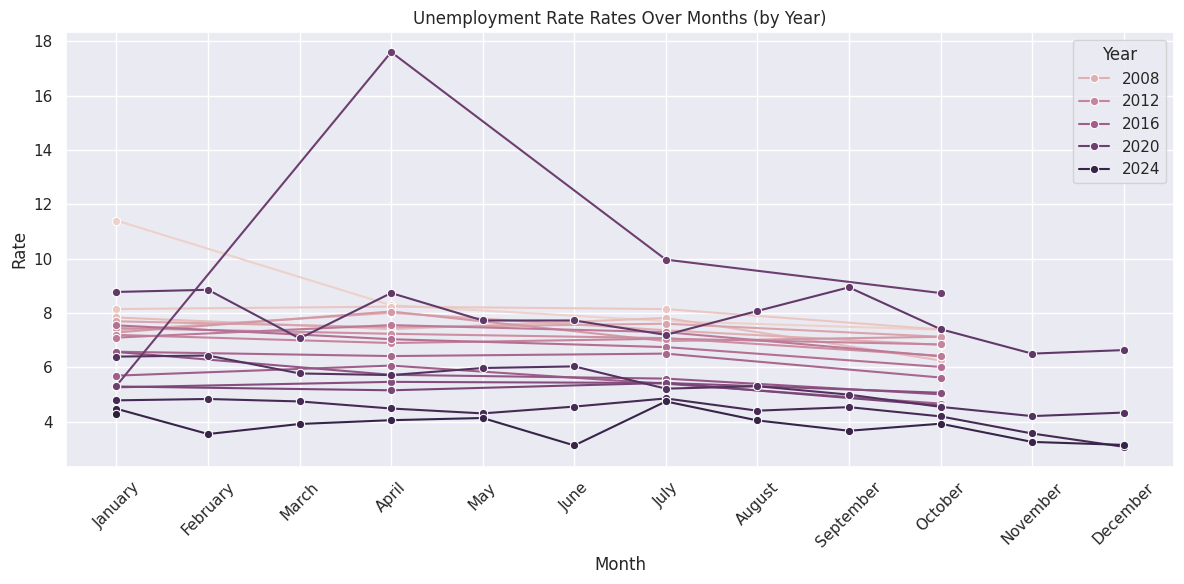

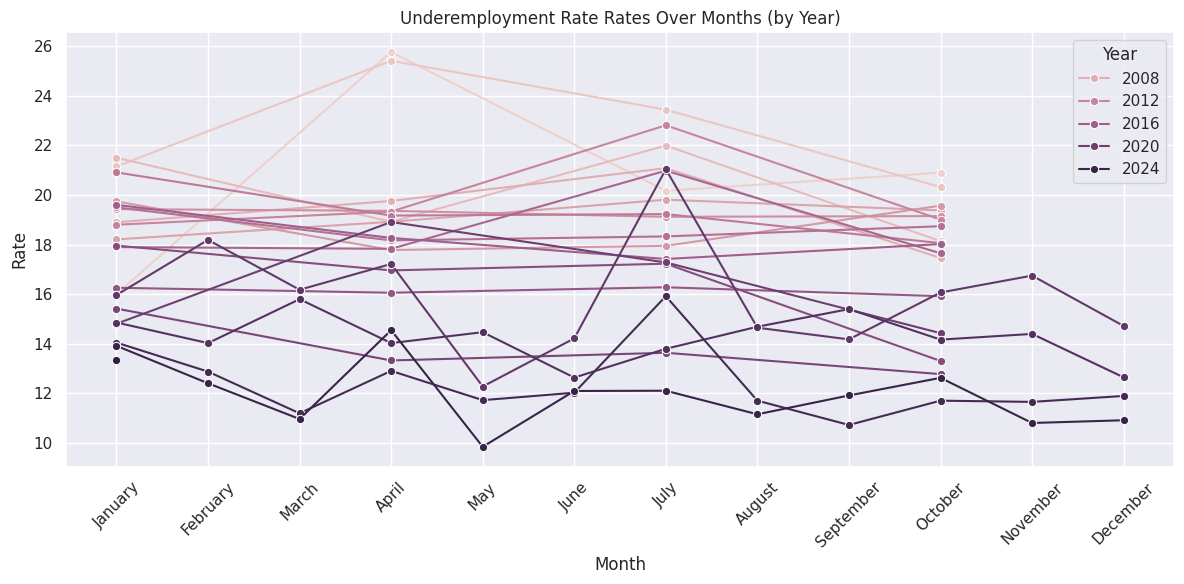

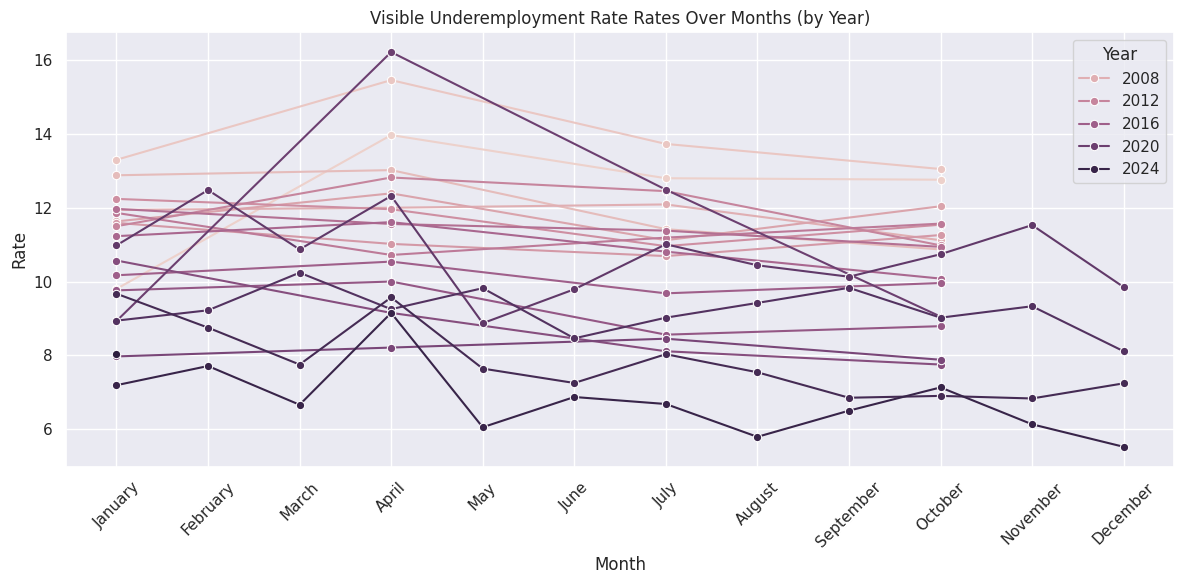

In [303]:
def plot_rates_by_category(employment):
    sns.set_theme(style="darkgrid")

    # Ensure Month is ordered properly
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    employment["Month"] = pd.Categorical(employment["Month"], categories=month_order, ordered=True)

    for category in employment["Rate Category"].unique():
        filtered_data = employment[employment["Rate Category"] == category]

        plt.figure(figsize=(12, 6))
        sns.lineplot(
            data=filtered_data,
            x="Month",
            y="Rate",
            hue="Year",
            marker="o"
        )

        plt.title(f"{category} Rates Over Months (by Year)")
        plt.xlabel("Month")
        plt.ylabel("Rate")
        plt.xticks(rotation=45)
        plt.legend(title="Year")
        plt.tight_layout()
        plt.grid(True)
        plt.show()

plot_rates_by_category(employment)

<ipython-input-304-6af3e134f168>:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_data.groupby("Month")["Rate"]


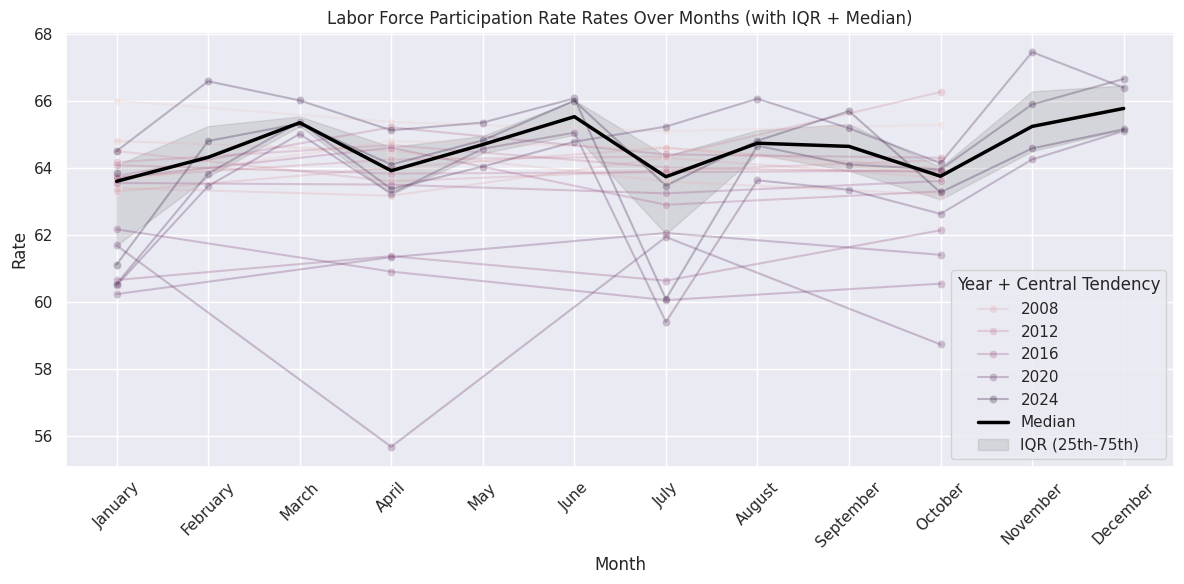

<ipython-input-304-6af3e134f168>:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_data.groupby("Month")["Rate"]


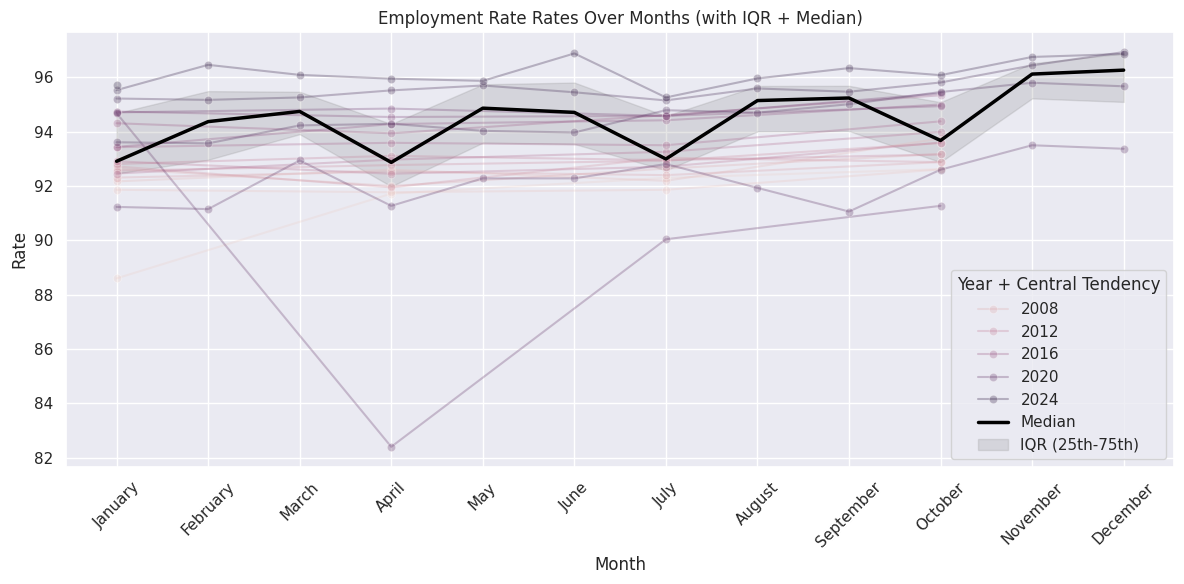

<ipython-input-304-6af3e134f168>:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_data.groupby("Month")["Rate"]


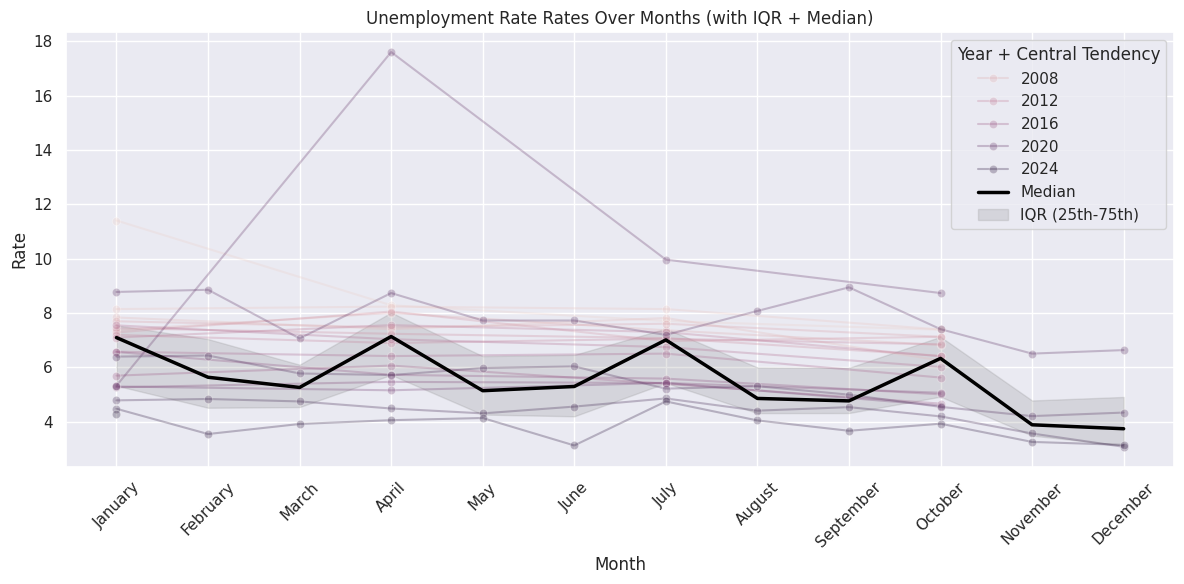

<ipython-input-304-6af3e134f168>:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_data.groupby("Month")["Rate"]


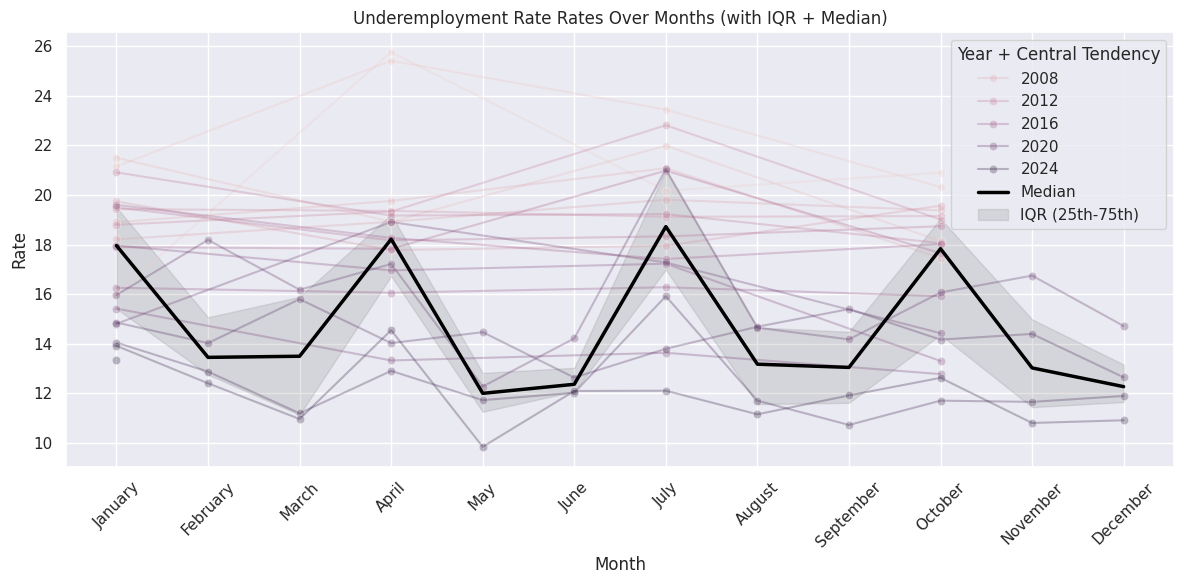

<ipython-input-304-6af3e134f168>:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_data.groupby("Month")["Rate"]


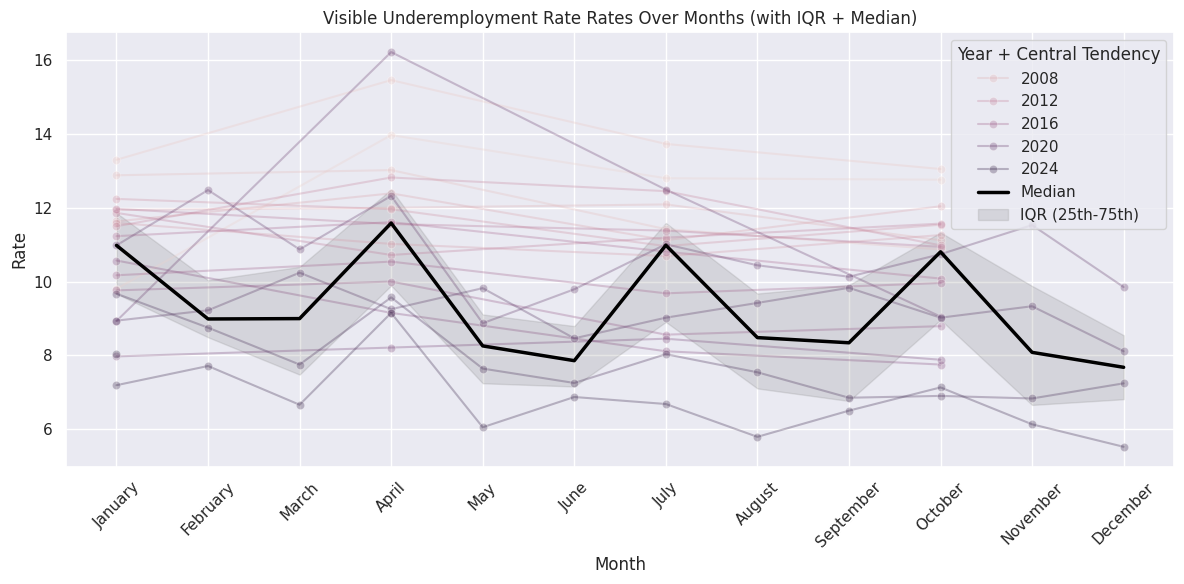

In [304]:
def plot_rates_with_iqr(employment):
    sns.set_theme(style="darkgrid")

    # Ensure Month is ordered properly
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    employment["Month"] = pd.Categorical(employment["Month"], categories=month_order, ordered=True)

    for category in employment["Rate Category"].unique():
        filtered_data = employment[employment["Rate Category"] == category]

        plt.figure(figsize=(12, 6))

        # Plot yearly lines
        sns.lineplot(
            data=filtered_data,
            x="Month",
            y="Rate",
            hue="Year",
            marker="o",
            alpha=0.3
        )

        # Compute IQR and Median for each Month (across all years)
        summary = (
            filtered_data.groupby("Month")["Rate"]
            .agg(Q1=lambda x: x.quantile(0.25),
                 Median="median",
                 Q3=lambda x: x.quantile(0.75))
            .reset_index()
        )

        # Plot the median line
        sns.lineplot(
            data=summary,
            x="Month",
            y="Median",
            color="black",
            linewidth=2.5,
            label="Median"
        )

        # Add shaded IQR
        plt.fill_between(
            summary["Month"],
            summary["Q1"],
            summary["Q3"],
            color="gray",
            alpha=0.2,
            label="IQR (25th-75th)"
        )

        plt.title(f"{category} Rates Over Months (with IQR + Median)")
        plt.xlabel("Month")
        plt.ylabel("Rate")
        plt.xticks(rotation=45)
        plt.legend(title="Year + Central Tendency")
        plt.tight_layout()
        plt.grid(True)
        plt.show()

plot_rates_with_iqr(employment)

# By Major Occupation

In [305]:
url = "https://raw.githubusercontent.com/glamosky/labor-and-employment/refs/heads/main/by%20occupation.csv"

In [306]:
occupation = pd.read_csv(url, skiprows=1)

occupation

,Geolocation,Major Occupation,2018 January Male,2018 January Female,2018 April Male,2018 April Female,2018 July Male,2018 July Female,2018 October Male,2018 October Female,...,2021 June Male,2021 June Female,2021 August Male,2021 August Female,2021 September Male,2021 September Female,2021 November Male,2021 November Female,2021 December Male,2021 December Female
0,PHILIPPINES,Total,25760.205,15994.830,25307.199,15589.180,25081.408,15568.303,25548.426,15776.597,...,26801.518,18274.115,26485.806,17745.236,26224.637,17368.291,27105.524,18368.762,27212.355,19062.114
1,PHILIPPINES,Managers,3244.009,3541.049,3093.180,3447.790,2953.884,3474.612,3186.420,3411.726,...,1548.065,1553.296,1545.165,1765.796,1295.256,1754.707,1675.830,1570.561,1055.854,788.437
2,PHILIPPINES,Professionals,808.350,1394.646,828.457,1370.048,778.785,1463.795,830.533,1495.911,...,782.403,1761.261,805.840,1235.408,810.259,1454.679,921.547,1833.471,834.477,1677.566
3,PHILIPPINES,Technicians and Associate Professionals,807.865,727.165,882.455,799.696,916.109,873.420,829.729,813.605,...,891.606,788.750,715.896,897.911,819.012,688.582,911.037,899.234,857.480,941.969
4,PHILIPPINES,Clerical Support Workers,915.972,1430.902,939.934,1464.776,966.424,1364.978,1054.992,1418.932,...,1123.189,1673.830,1122.985,1795.191,1241.779,1836.890,1416.957,1645.740,1306.441,1969.136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,BARMM,Skilled Agricultural Forestry and Fishery Workers,506.665,38.557,424.675,49.852,423.114,55.098,459.392,45.293,...,523.308,92.566,349.005,44.425,465.198,97.704,470.607,113.103,487.349,96.411
194,BARMM,Craft and Related Trades Workers,18.960,2.803,33.336,9.476,38.545,4.793,26.357,7.331,...,42.538,12.241,44.983,12.584,47.786,30.711,33.596,11.585,35.201,7.026
195,BARMM,Plant and Machine Operators and Assemblers,32.346,0.000,66.853,0.681,53.361,1.035,44.775,0.000,...,65.168,0.000,95.164,0.000,110.043,0.000,105.841,0.898,116.521,0.811
196,BARMM,Elementary Occupations,120.089,92.965,78.381,48.436,143.548,66.847,133.881,88.999,...,180.019,173.700,260.029,98.159,191.563,107.186,144.122,173.196,144.509,116.655


In [307]:
occupation = occupation.rename(columns = {'Major Occupation':'Occupation'})

In [308]:
occupation = occupation[(occupation.Geolocation != "PHILIPPINES") & (occupation.Occupation != "Total")]

occupation

,Geolocation,Occupation,2018 January Male,2018 January Female,2018 April Male,2018 April Female,2018 July Male,2018 July Female,2018 October Male,2018 October Female,...,2021 June Male,2021 June Female,2021 August Male,2021 August Female,2021 September Male,2021 September Female,2021 November Male,2021 November Female,2021 December Male,2021 December Female
12,NCR,Managers,393.268,448.821,412.267,448.700,383.575,435.604,448.532,473.166,...,238.375,327.137,288.115,283.240,219.721,339.790,259.102,318.265,203.138,174.510
13,NCR,Professionals,199.566,211.795,193.381,204.823,191.332,234.955,209.982,226.309,...,175.975,263.837,168.893,202.638,146.808,157.710,227.893,329.200,199.804,311.004
14,NCR,Technicians and Associate Professionals,164.642,127.503,229.759,190.970,207.958,169.456,220.397,155.177,...,216.809,195.469,222.639,242.008,154.115,125.369,244.412,203.428,261.300,229.533
15,NCR,Clerical Support Workers,263.171,366.055,284.011,373.538,277.363,355.856,305.263,399.884,...,254.755,410.450,324.953,447.853,316.869,419.971,364.640,459.347,383.226,491.205
16,NCR,Service and Sales Workers,519.710,519.266,503.853,475.251,503.214,505.897,490.274,525.902,...,590.284,717.866,588.735,881.520,584.778,678.961,647.273,695.412,692.999,977.382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,BARMM,Skilled Agricultural Forestry and Fishery Workers,506.665,38.557,424.675,49.852,423.114,55.098,459.392,45.293,...,523.308,92.566,349.005,44.425,465.198,97.704,470.607,113.103,487.349,96.411
194,BARMM,Craft and Related Trades Workers,18.960,2.803,33.336,9.476,38.545,4.793,26.357,7.331,...,42.538,12.241,44.983,12.584,47.786,30.711,33.596,11.585,35.201,7.026
195,BARMM,Plant and Machine Operators and Assemblers,32.346,0.000,66.853,0.681,53.361,1.035,44.775,0.000,...,65.168,0.000,95.164,0.000,110.043,0.000,105.841,0.898,116.521,0.811
196,BARMM,Elementary Occupations,120.089,92.965,78.381,48.436,143.548,66.847,133.881,88.999,...,180.019,173.700,260.029,98.159,191.563,107.186,144.122,173.196,144.509,116.655


In [309]:
occupation = occupation.replace([".."], 0.0)
occupation = occupation.replace(0.0, np.nan)

<ipython-input-309-516f78efb87a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  occupation = occupation.replace([".."], 0.0)


In [310]:
# Extract unique year-month combinations
year_months = set(col.rsplit(' ', 1)[0] for col in occupation.columns if "Male" in col or "Female" in col)

# Create a new DataFrame to store the combined data
combined_df = pd.DataFrame()
combined_df['Geolocation'] = occupation['Geolocation']
combined_df['Occupation'] = occupation['Occupation']  # Include 'Occupation' column

# Iterate through year-month combinations and sum male and female columns
for year_month in year_months:
    male_col = f"{year_month} Male"
    female_col = f"{year_month} Female"

    if male_col in occupation.columns and female_col in occupation.columns:
        # Convert columns to numeric
        occupation[male_col] = pd.to_numeric(occupation[male_col], errors='coerce')
        occupation[female_col] = pd.to_numeric(occupation[female_col], errors='coerce')
        # Sum "Male" and "Female" columns (handling potential NaNs)
        combined_df[year_month] = occupation[male_col] + occupation[female_col]

# Print the combined DataFrame
print(combined_df)

    Geolocation                                         Occupation  \
12          NCR                                           Managers   
13          NCR                                      Professionals   
14          NCR            Technicians and Associate Professionals   
15          NCR                           Clerical Support Workers   
16          NCR                          Service and Sales Workers   
..          ...                                                ...   
193       BARMM  Skilled Agricultural Forestry and Fishery Workers   
194       BARMM                   Craft and Related Trades Workers   
195       BARMM         Plant and Machine Operators and Assemblers   
196       BARMM                             Elementary Occupations   
197       BARMM                           Armed Forces Occupations   

     2020 September  2021 October  2020 March  2018 November  2020 February  \
12              NaN       639.301         NaN            NaN            NaN   
1

In [311]:
combined_df.columns

Index(['Geolocation', 'Occupation', '2020 September', '2021 October',
       '2020 March', '2018 November', '2020 February', '2020 Annual',
       '2021 July', '2021 December', '2021 January', '2019 March',
       '2018 January', '2021 September', '2018 September', '2020 December',
       '2021 March', '2019 April', '2020 January', '2020 October', '2019 May',
       '2019 Annual', '2018 October', '2018 June', '2021 May', '2018 July',
       '2018 February', '2019 July', '2021 June', '2019 October',
       '2019 November', '2018 December', '2021 November', '2020 June',
       '2019 December', '2019 August', '2019 February', '2020 May',
       '2020 November', '2021 Annual', '2021 April', '2019 June', '2020 April',
       '2019 September', '2021 August', '2018 August', '2018 March',
       '2019 January', '2018 April', '2020 July', '2021 February',
       '2018 Annual', '2020 August', '2018 May'],
      dtype='object')

In [312]:
combined_df = combined_df[['Geolocation', 'Occupation', '2018 Annual', '2018 January', '2018 February', '2018 March', '2018 April', '2018 May', '2018 June', '2018 July', '2018 August', '2018 September', '2018 October', '2018 November', '2018 December',
                           '2019 Annual', '2019 January', '2019 February', '2019 March', '2019 April', '2019 May', '2019 June', '2019 July', '2019 August', '2019 September', '2019 October', '2019 November', '2019 December',
                           '2020 Annual', '2020 January', '2020 February', '2020 March', '2020 April', '2020 May', '2020 June', '2020 July', '2020 August', '2020 September', '2020 October', '2020 November', '2020 December',
                           '2021 Annual', '2021 January', '2021 February', '2021 March', '2021 April', '2021 May', '2021 June', '2021 July', '2021 August', '2021 September', '2021 October', '2021 November', '2021 December'
                           ]]
print(combined_df)

    Geolocation                                         Occupation  \
12          NCR                                           Managers   
13          NCR                                      Professionals   
14          NCR            Technicians and Associate Professionals   
15          NCR                           Clerical Support Workers   
16          NCR                          Service and Sales Workers   
..          ...                                                ...   
193       BARMM  Skilled Agricultural Forestry and Fishery Workers   
194       BARMM                   Craft and Related Trades Workers   
195       BARMM         Plant and Machine Operators and Assemblers   
196       BARMM                             Elementary Occupations   
197       BARMM                           Armed Forces Occupations   

     2018 Annual  2018 January  2018 February  2018 March  2018 April  \
12       860.984       842.089            NaN         NaN     860.967   
13       418.

In [313]:
occupation = pd.melt(
    combined_df,
    id_vars = ["Geolocation", "Occupation"],
    value_vars = combined_df.columns[1:],
    var_name = "Year",
    value_name = "Labor Force (in thousands)"
)

occupation

,Geolocation,Occupation,Year,Labor Force (in thousands)
0,NCR,Managers,2018 Annual,860.984
1,NCR,Professionals,2018 Annual,418.036
2,NCR,Technicians and Associate Professionals,2018 Annual,366.466
3,NCR,Clerical Support Workers,2018 Annual,656.285
4,NCR,Service and Sales Workers,2018 Annual,1010.842
...,...,...,...,...
8835,BARMM,Skilled Agricultural Forestry and Fishery Workers,2021 December,583.760
8836,BARMM,Craft and Related Trades Workers,2021 December,42.227
8837,BARMM,Plant and Machine Operators and Assemblers,2021 December,117.332
8838,BARMM,Elementary Occupations,2021 December,261.164


In [314]:
print(occupation['Labor Force (in thousands)'].describe())

count    4390.000000
mean      265.737567
std       286.904235
min         0.554000
25%        67.555250
50%       160.811500
75%       372.865500
max      1840.238000
Name: Labor Force (in thousands), dtype: float64


In [315]:
print(occupation['Labor Force (in thousands)'].isna().sum())

4450


In [316]:
occupation['Labor Force (in thousands)'] = occupation.groupby(['Occupation'])['Labor Force (in thousands)'].ffill()

In [317]:
annual_rows = occupation[occupation["Year"].str.contains("Annual", case=False, na=False)]
occupation = occupation[~occupation.index.isin(annual_rows.index)]

occupation

,Geolocation,Occupation,Year,Labor Force (in thousands)
170,NCR,Managers,2018 January,842.089
171,NCR,Professionals,2018 January,411.361
172,NCR,Technicians and Associate Professionals,2018 January,292.145
173,NCR,Clerical Support Workers,2018 January,629.226
174,NCR,Service and Sales Workers,2018 January,1038.976
...,...,...,...,...
8835,BARMM,Skilled Agricultural Forestry and Fishery Workers,2021 December,583.760
8836,BARMM,Craft and Related Trades Workers,2021 December,42.227
8837,BARMM,Plant and Machine Operators and Assemblers,2021 December,117.332
8838,BARMM,Elementary Occupations,2021 December,261.164


In [318]:
descriptions = occupation.groupby("Occupation")["Labor Force (in thousands)"].describe()
print(descriptions)

                                                   count        mean  \
Occupation                                                             
Armed Forces Occupations                           816.0    9.626695   
Clerical Support Workers                           816.0   81.264663   
Craft and Related Trades Workers                   816.0  111.183499   
Elementary Occupations                             816.0  465.142202   
Managers                                           816.0  192.840326   
Plant and Machine Operators and Assemblers         816.0  135.819393   
Professionals                                      816.0   83.340103   
Service and Sales Workers                          816.0  284.896353   
Skilled Agricultural Forestry and Fishery Workers  816.0  410.689678   
Technicians and Associate Professionals            816.0   53.601196   

                                                          std      min  \
Occupation                                                   

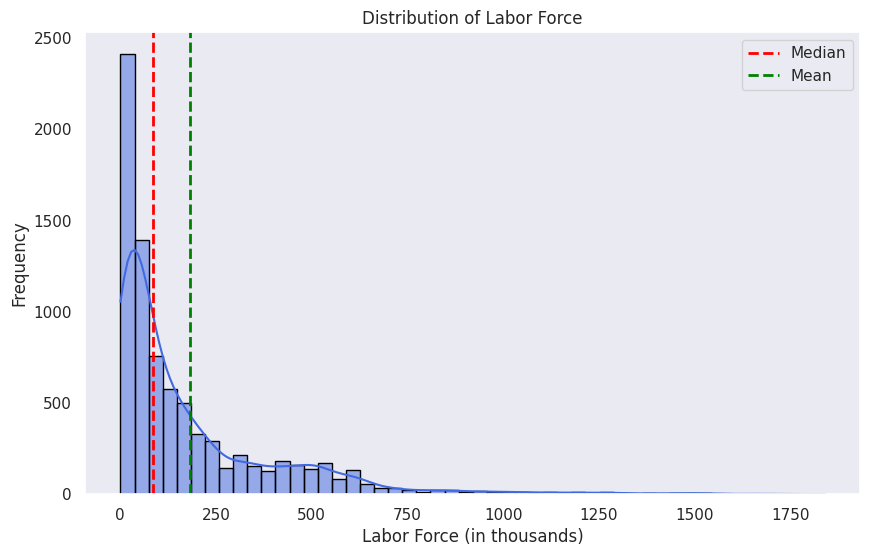

In [319]:
plt.figure(figsize=(10, 6))
sns.histplot(occupation["Labor Force (in thousands)"], bins = 50, kde = True, color = "royalblue", edgecolor = "black")
plt.axvline(occupation["Labor Force (in thousands)"].median(), color='red', linestyle = 'dashed', linewidth = 2, label = "Median")
plt.axvline(occupation["Labor Force (in thousands)"].mean(), color='green', linestyle = 'dashed', linewidth = 2, label = "Mean")
plt.title("Distribution of Labor Force")
plt.xlabel("Labor Force (in thousands)")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

plt.show()

Even after cleaning and imputing missing labor force data, the distribution remains heavily right-skewed, indicating inherent disparities across occupational groups.

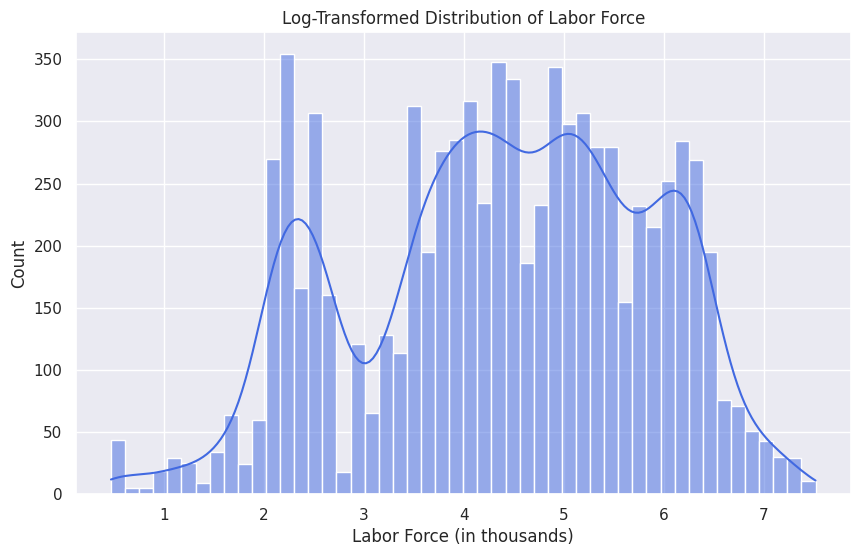

In [320]:
plt.figure(figsize=(10,6))
sns.histplot(np.log1p(occupation["Labor Force (in thousands)"]), bins=50, kde=True, color="royalblue")
plt.title("Log-Transformed Distribution of Labor Force")
plt.show()

<ipython-input-325-198eccba10a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation['Time'] = pd.to_datetime(occupation['Year'], format='%Y %B')
<ipython-input-325-198eccba10a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation['Year_Only'] = occupation['Time'].dt.year


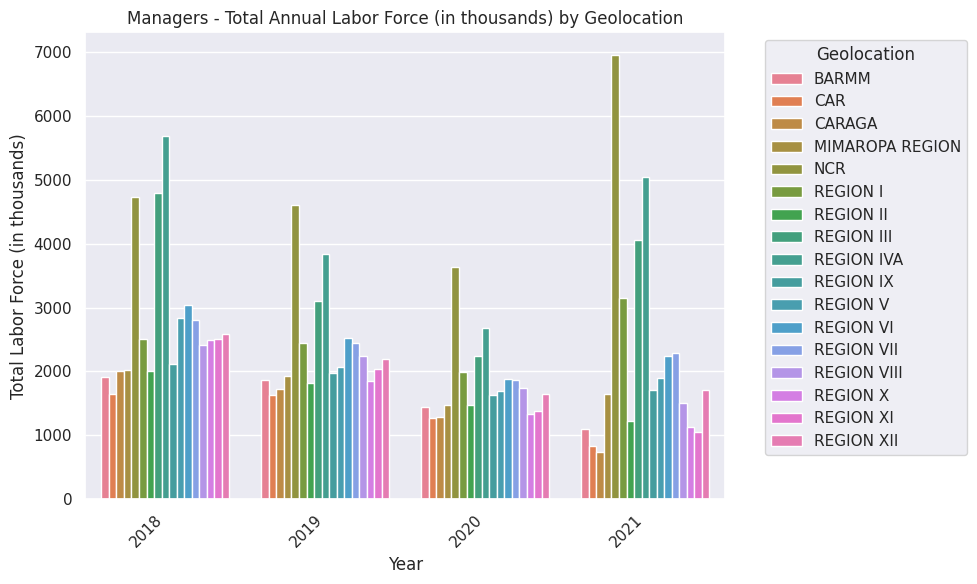

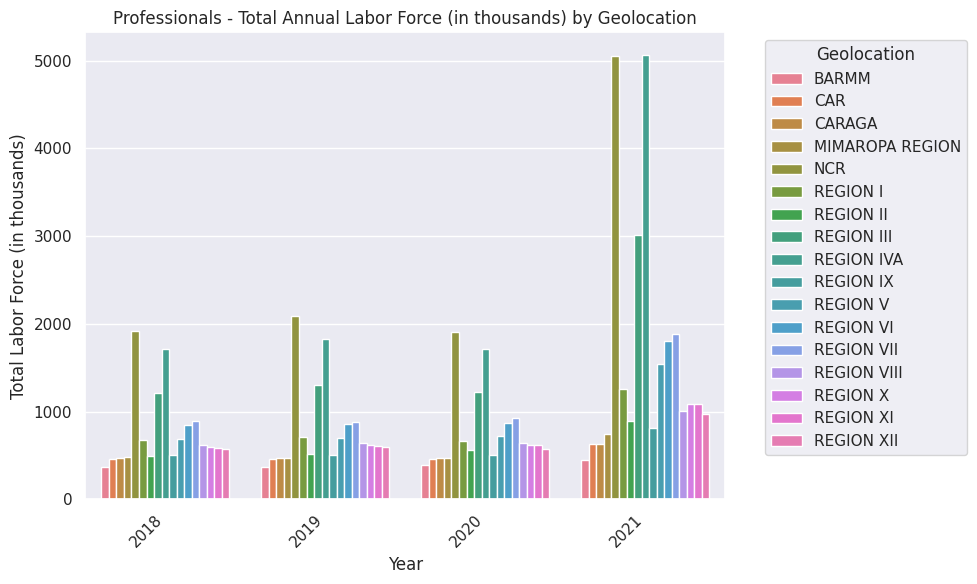

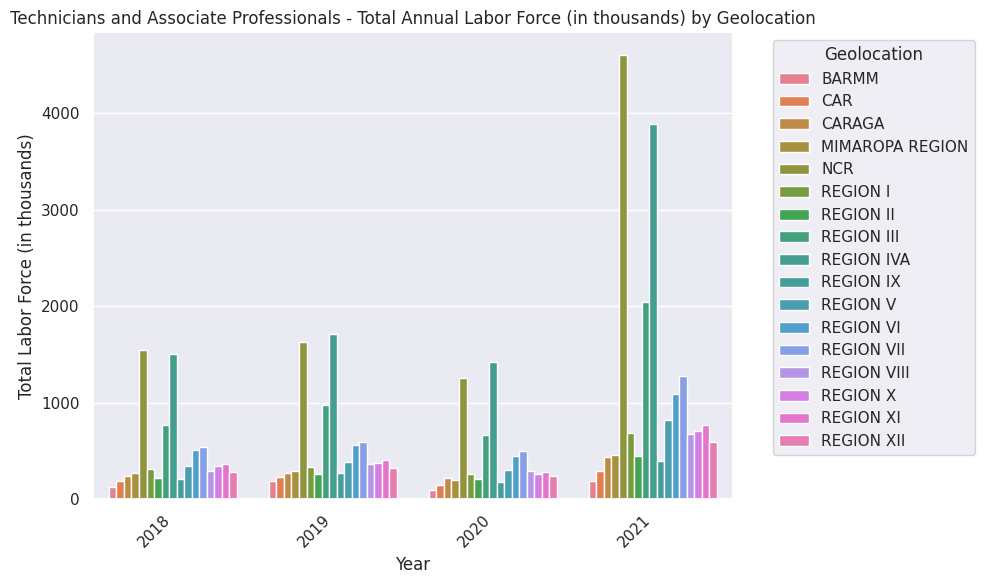

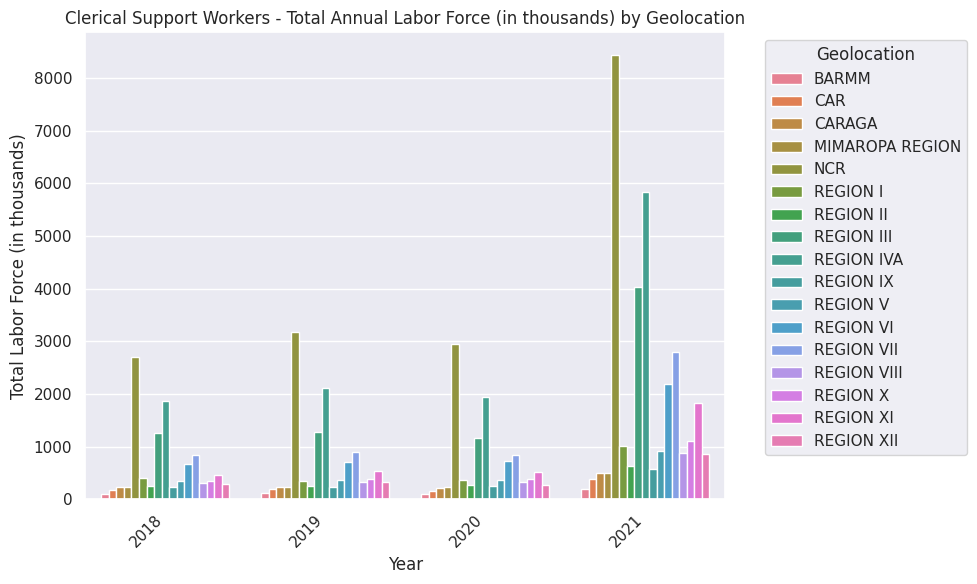

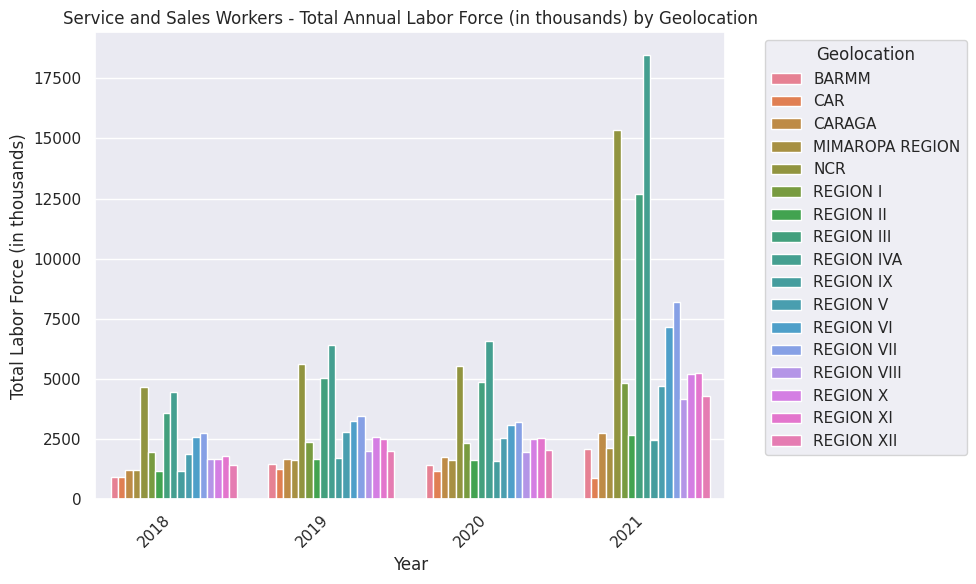

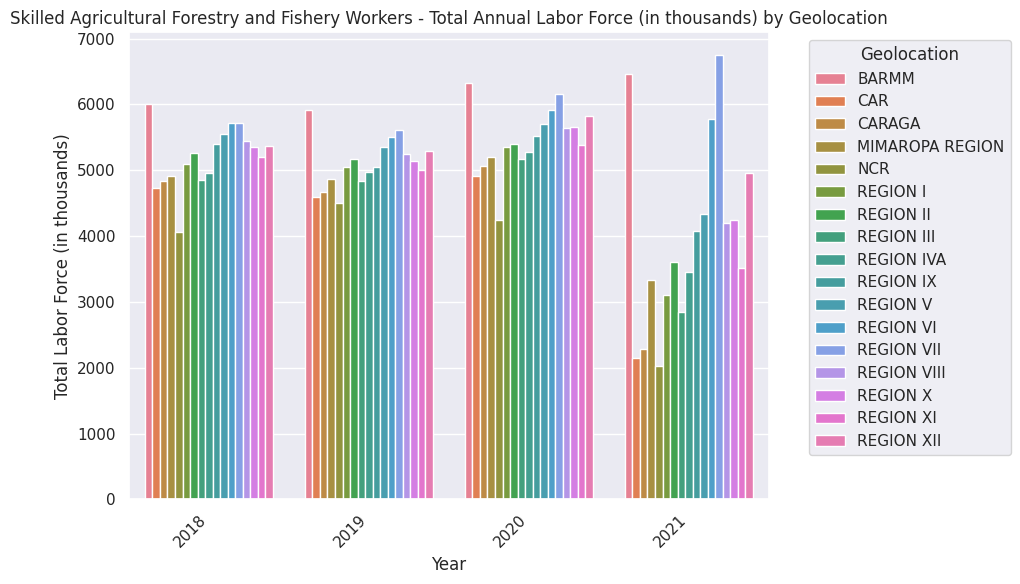

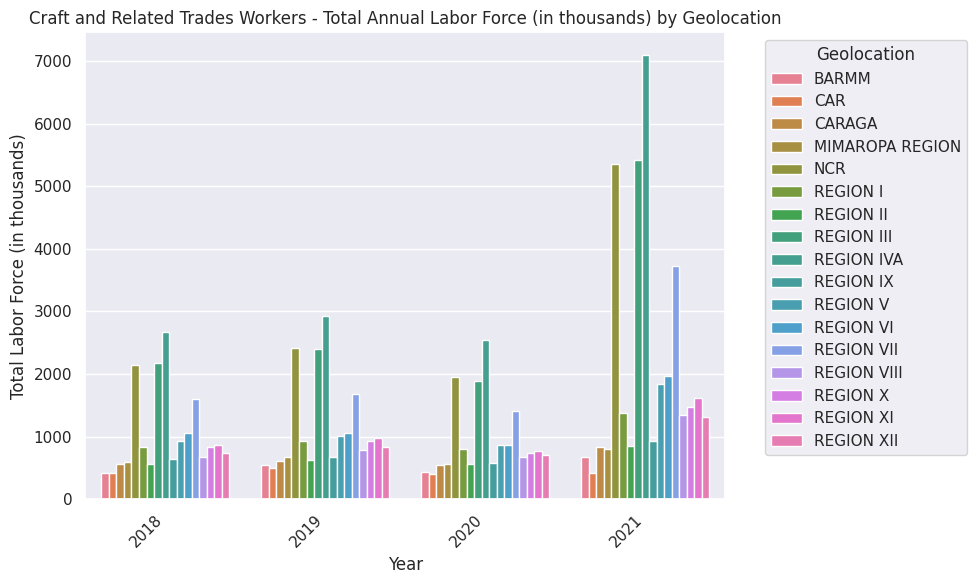

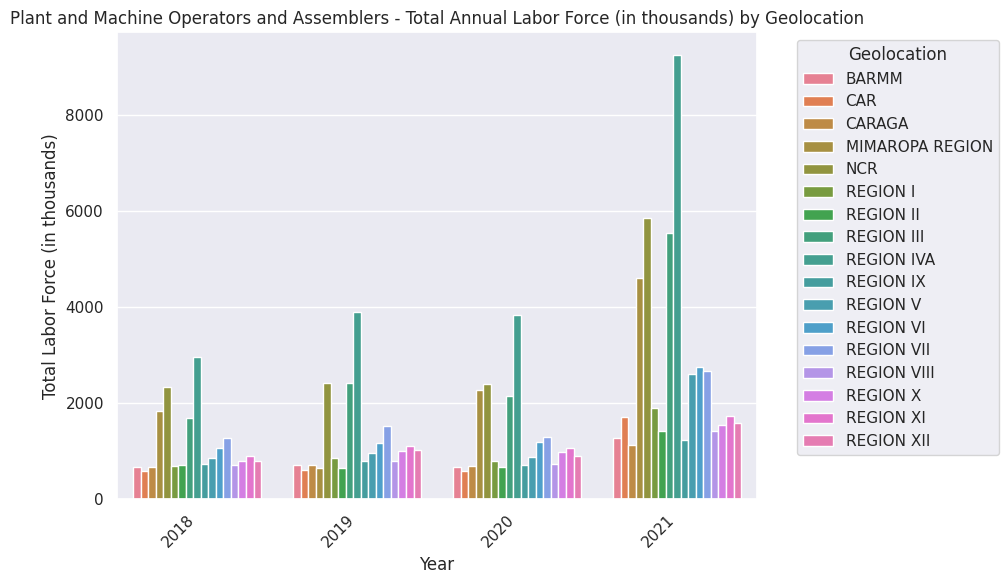

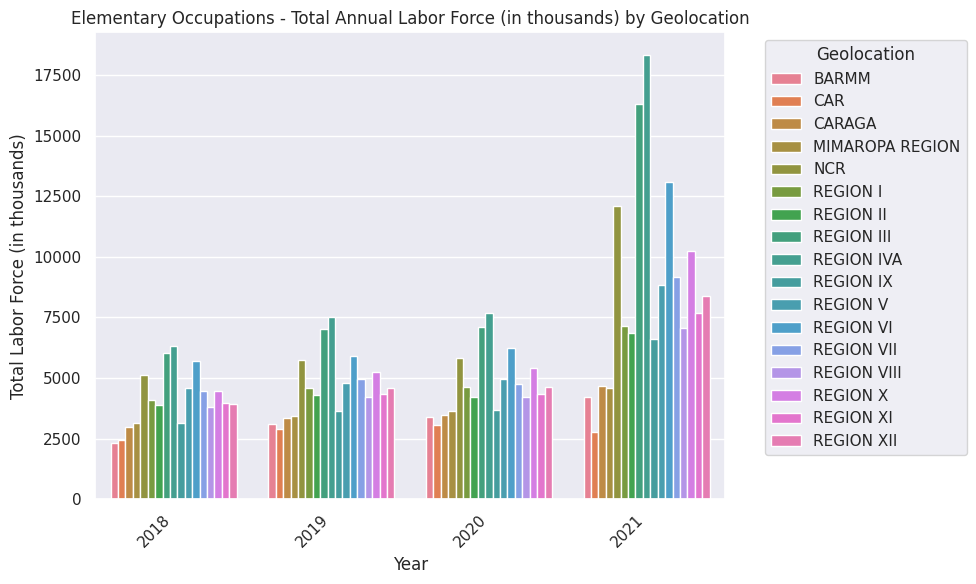

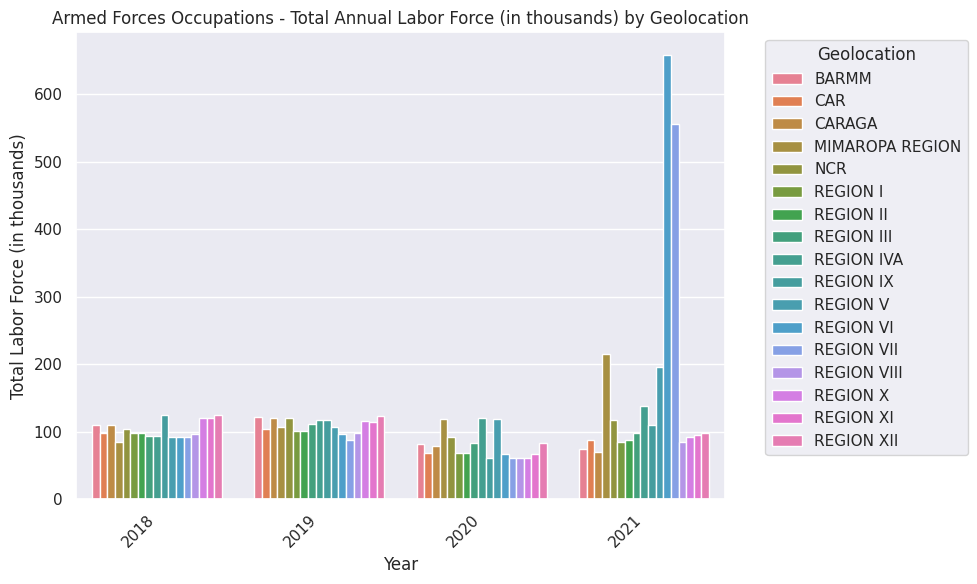

In [325]:
def plot_yearly_labor(occupation):
    # Convert 'Year' column to datetime objects to extract year
    occupation['Time'] = pd.to_datetime(occupation['Year'], format='%Y %B')
    occupation['Year_Only'] = occupation['Time'].dt.year

    # Loop through each unique occupation
    for job in occupation["Occupation"].unique():
        sns.set_theme(style="darkgrid")
        plt.figure(figsize=(10, 6))

        # Group by year and geolocation, and sum the labor force
        yearly_data = occupation[occupation["Occupation"] == job].groupby(['Year_Only', 'Geolocation'])['Labor Force (in thousands)'].sum().reset_index()

        # Plot the data
        sns.barplot(
            data=yearly_data,
            x='Year_Only',
            y='Labor Force (in thousands)',
            hue='Geolocation'
        )

        plt.title(f"{job} - Total Annual Labor Force (in thousands) by Geolocation")
        plt.xlabel("Year")
        plt.ylabel("Total Labor Force (in thousands)")
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Geolocation', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

plot_yearly_labor(occupation)